In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

In [2]:
[10, 20, 30, 40, 50, 60, 70, 80, 90]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [4]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [5]:
# CNN Model

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 예제 데이터 생성
n_steps = 10
n_features = 1

# 임의의 시계열 데이터 생성 (100개의 샘플, 각 샘플은 n_steps 길이, 각 타임스텝은 n_features 수의 특징을 가짐)
X = np.random.rand(100, n_steps, n_features)
y = np.random.rand(100)

# 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 요약 출력
model.summary()

# 모델 학습
model.fit(X, y, epochs=10, verbose=1)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,093 (51.14 KB)

 Trainable params: 13,093 (51.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3106  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1185
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0887
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0931
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0945
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0865
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0905
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0795
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0813 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.0847


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 9, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,093 (51.14 KB)

 Trainable params: 13,093 (51.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1859 - val_loss: 0.0961
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - val_loss: 0.0827
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0851 - val_loss: 0.0907
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0833 - val_loss: 0.0811
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0840 - val_loss: 0.0790
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0767 - val_loss: 0.0830
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - val_loss: 0.0845
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0730 - val_loss: 0.0820
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0722 - val_loss: 0.0792
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - val_loss: 0.0790
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


실제 값: 0.4884822491603448, 예측 값: 0.34595221281051636


실제 값: 0.5471689219173691, 예측 값: 0.5439811944961548


실제 값: 0.46418075281642857, 예측 값

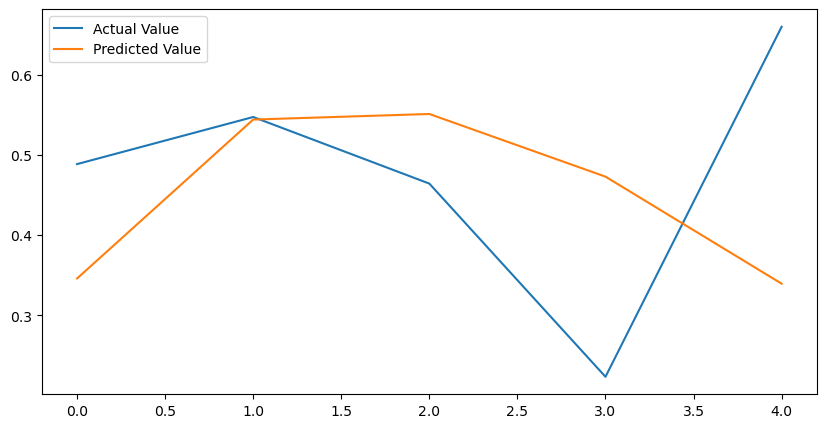

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 예제 데이터 생성
n_steps = 10
n_features = 1

# 임의의 시계열 데이터 생성 (100개의 샘플, 각 샘플은 n_steps 길이, 각 타임스텝은 n_features 수의 특징을 가짐)
X = np.random.rand(100, n_steps, n_features)
y = np.random.rand(100)

# 데이터 분할 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 요약 출력
model.summary()

# 모델 학습
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)

# 예측 수행
X_new = X_val[:5]  # 예시로 검증 데이터의 일부를 사용
y_true = y_val[:5]  # 실제 값
y_pred = model.predict(X_new)

# 예측 결과 출력
for i in range(len(y_true)):
    print("\n\n" + f"실제 값: {y_true[i]}, 예측 값: {y_pred[i][0]}")

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual Value')
plt.plot(y_pred, label='Predicted Value')
plt.legend()
plt.show()


In [ ]:
# 모델 정확도 향상 trial

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 8, 128)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 2, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,753 (124.04 KB)

 Trainable params: 31,753 (124.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 0.3636
Epoch 1: val_loss improved from inf to 0.13771, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.3236 - val_loss: 0.1377
Epoch 2/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1591
Epoch 2: val_loss improved from 0.13771 to 0.08959, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1376 - val_loss: 0.0896
Epoch 3/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0870
Epoch 3: val_loss did not improve from 0.08959
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0936 - val_loss: 0.1207
Epoch 4/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1161
Epoch 4: val_loss did not improve from 0.08959
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1112 - val_loss: 0.1194
Epoch 5/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1181
Epoch 5: val_loss did not improve from 0.08959
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1064 - val_loss: 0.0968
Epoch 6/10

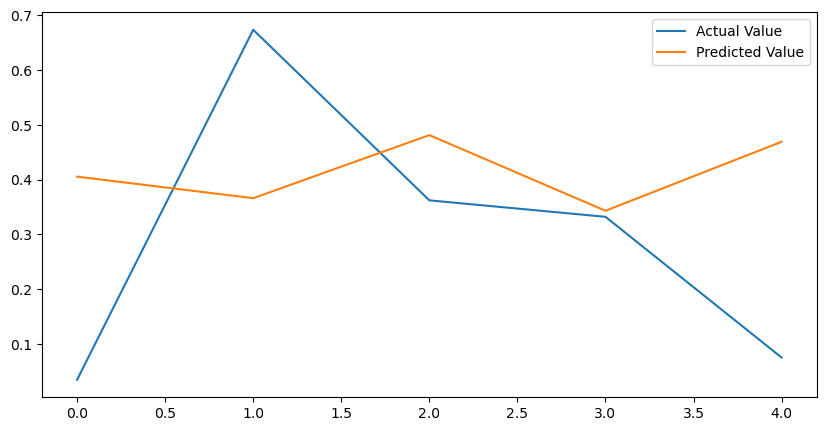

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 데이터 생성
n_steps = 10
n_features = 1
X = np.random.rand(100, n_steps, n_features)
y = np.random.rand(100)

# 데이터 전처리 (정규화)
scaler = MinMaxScaler()
X = X.reshape(-1, n_steps * n_features)
X = scaler.fit_transform(X)
X = X.reshape(-1, n_steps, n_features)

# 데이터 분할 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 요약 출력
model.summary()

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', verbose=1)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping, model_checkpoint], verbose=1)

# 모델 로드 (체크포인트에서 가장 좋은 모델)
best_model = load_model('best_model.keras')

# 예측 수행
X_new = X_val[:5]  # 예시로 검증 데이터의 일부를 사용
y_true = y_val[:5]  # 실제 값
y_pred = best_model.predict(X_new)

# 예측 결과 출력
for i in range(len(y_true)):
    print("\n\n" + f"실제 값: {y_true[i]}, 예측 값: {y_pred[i][0]}")

# 모델 평가
mae = mean_absolute_error(y_val, best_model.predict(X_val))
r2 = r2_score(y_val, best_model.predict(X_val))
print(f'MAE: {mae}, R2: {r2}')

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual Value')
plt.plot(y_pred, label='Predicted Value')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE: 0.2993233045309263, MAPE: 1.846114683030383


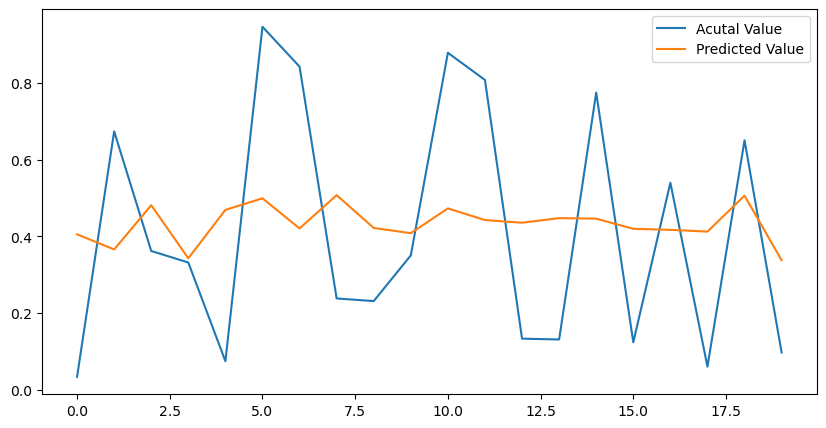

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

y_pred_val = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mape = mean_absolute_percentage_error(y_val, y_pred_val)

print("\n" + f'RMSE: {rmse}, MAPE: {mape}')

# 결과 시각화 (전체 검증 데이터)
plt.figure(figsize=(10, 5))
plt.plot(y_val, label='Acutal Value')
plt.plot(y_pred_val, label='Predicted Value')
plt.legend()
plt.show()
